<a href="https://colab.research.google.com/github/phzfi/ai-course/blob/main/nn/2_bit_adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# this can also be generated with np.binary_repr etc.
mapping = np.array([[0, 0, 0, 0,  0, 0, 0],
                    [0, 0, 0, 1,  0, 0, 1],
                    [0, 0, 1, 0,  0, 1, 0],
                    [0, 0, 1, 1,  0, 1, 1],
                    [0, 1, 0, 0,  0, 0, 1],
                    [0, 1, 0, 1,  0, 1, 0],
                    [0, 1, 1, 0,  0, 1, 1],
                    [0, 1, 1, 1,  1, 0, 0],
                    [1, 0, 0, 0,  0, 1, 0],
                    [1, 0, 0, 1,  0, 1, 1],
                    [1, 0, 1, 0,  1, 0, 0],
                    [1, 0, 1, 1,  1, 0, 1],
                    [1, 1, 0, 0,  0, 1, 1],
                    [1, 1, 0, 1,  1, 0, 1],
                    [1, 1, 1, 0,  1, 0, 1],
                    [1, 1, 1, 1,  1, 1, 0]])

input_values = mapping[:,0:4]
output_values = mapping[:,4:]

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential([
    Dense(10, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='sigmoid'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                50        
                                                                 
 dense_16 (Dense)            (None, 8)                 88        
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [45]:
history = model.fit(input_values, output_values,
                   batch_size=1,
                   epochs=1000,
                   verbose=0)

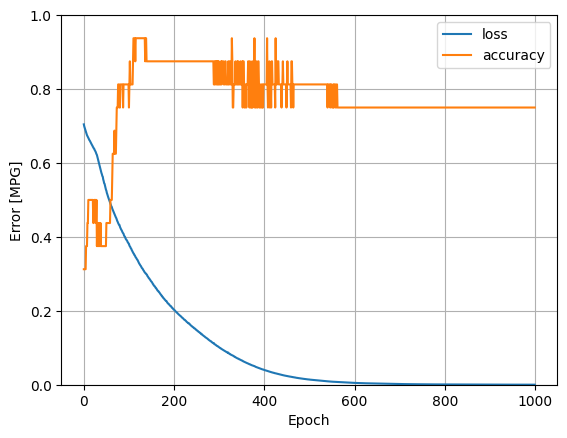

In [46]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [54]:
prediction = model.predict(input_values)
np.round(prediction).astype(int)


1/1 [==============================] - 0s 61ms/step


array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 0]])